# Homework 4 Notebook
The following walk-through [based on a tutorial from the blog "Towards Data Science"](https://towardsdatascience.com/exploratory-analysis-python-kaggle-data-b0afb6ec1788), does a nice job of bringing together everything we've learned about so far, and will serve as a great template for your final project. 

1. Download the dataset from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)
2. Download and complete this Jupyter Notebook
3.  the completed Jupyter Notebook as your homework assignment 4

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:/Users/aakan/OneDrive - UW/2) Fall Quarter 2019/Python/Lecture 4/KaggleV2-May-2016.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Step 1: Describe the dataset
Let us know where this dataset came from, what the columns contain, the dimensions, and any other important information about this dataset.

#### Fill in your dataset description here

In [ ]:
# This dataset came from Kaggle - https://www.kaggle.com/joniarroba/noshowappointments/data
# The data consists of 110,527 medical appointments and its 14 associated variables

# Data Dictionary -
# 1) PatientId      - Identification of a patient
# 2) AppointmentID  - Identification of each appointment
# 3) Gender         - Male or Female. Female proportion is greater as women take more care of their health in comparison to men
# 4) ScheduledDay   - The day someone called or registered the appointment (before appointment)
# 5) AppointmentDay - The day of the actuall appointment, when they have to visit the doctor
# 6) Age            - How old is the patient
# 7) Neighbourhood  - Where the appointment takes place
# 8) Scholarship    - Does the patient receive a scholarship? True of False
# 9) Hipertension   - Does the patient have hypertension? True or False
# 10)Diabetes       - Does the patient have Diabetes? True or False
# 11)Alcoholism     - Is the patient an Alcoholic? True or False
# 12)Handcap        - Is the patient an Handicap? True or False
# 13)SMS_received   - Has the patient received an SMS reminder? 1 or more messages sent to the patient
# 14)No-show        - Has the patient decided not to show up? True or False

# Target Variable - No-show - We want to understand what causes no - shows or missing appointments?

## Step 2: Outline Exploratory Goals
What kind of questions do you think can be answered from this dataset? What relationships do you want to explore? 

 We can answer the following questions from this data -
Main goal - Why people who book medical appointments don't show up? 
For this we want to understand the below in this EDA -

-What proportion of people miss appointments?
-Distribution, frequency and relationships of the variables 
-Age distribution of people. Do missing appointments increase with age?
-Is there a relationship between missing appointments and gender?
-Is there a relationship between missing appointments and SMS reminders? Do people miss appointments because they were not          sent SMS?

Further questions requiring more detailed analysis -
-Do certain neighborhoods have more missing appointments?
-Do certain diseases or conditions like Diabetes have more missing appointments?
-Do longer gaps between schedule day and appointment day cause no - shows? In other words, do people forget their          appointments when they schedule their appointments too soon?
-Is there a particular month when people don't show up?
-Are no shows more on weekdays or weekends?

As you go through this analysis, jot down any other questions that come to mind from your exploration so that you don't forget to examine them. 

## Step 3: Preparing the dataset
We'll start by reading the datset in as a Pandas dataframe. 

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("C:/Users/aakan/OneDrive - UW/2) Fall Quarter 2019/Python/Lecture 4/KaggleV2-May-2016.csv")

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now we can remove some of the columns we won't be using. This becomes more important if you're working with very large datasets and can reduce some of your processing time: 

In [7]:
df.drop(['PatientId', 'AppointmentID', 'Scholarship'], 
        axis=1, 
        inplace=True)

Let's use the info() function to check data types and nulls: 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(6), object(5)
memory usage: 9.3+ MB


We can see that many of the categorical columns have already been binarized and everything is in the expected format, without any nulls to deal with. 

In [9]:
print("Number of records (patients): ", df.shape[0])
print("Number of columns (features): ", df.shape[1])

Number of records (patients):  110527
Number of columns (features):  11


### Step 4: Data Munging
There were some misspelled column names, so fix those up using the rename() function: 

In [10]:
df = df.rename(columns={'Hipertension': 'Hypertension', 
                        'Handcap': 'Handicap', 
                        'SMS_received': 'SMSReceived'})

In [11]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No


## Step 5: EDA
Now we'll walk through all of the EDA techniques we've learned about so far. 

#### Univariate Analysis
Provide summary information about the distribution of data in each column, and write a paragraph summarizing your findings: 

In [13]:
df.describe()

,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
#list of numeric columns
numeric_cols = df.select_dtypes('number').columns

In [15]:
#import seaborn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

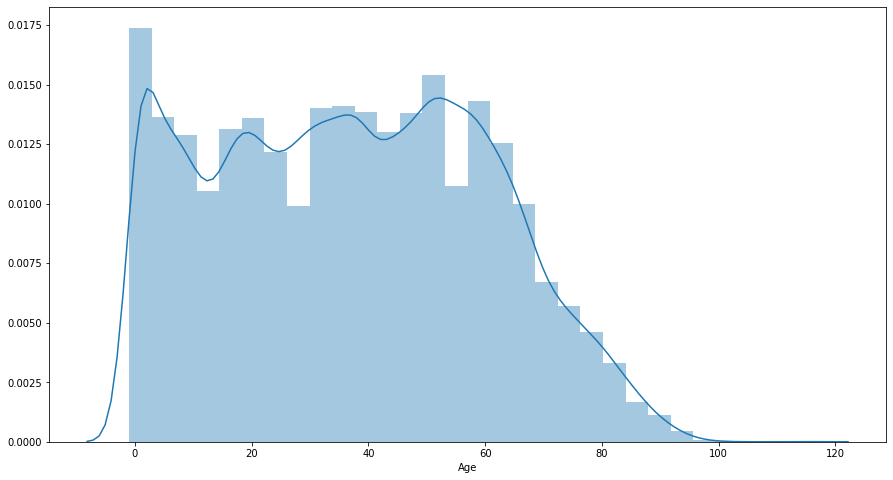

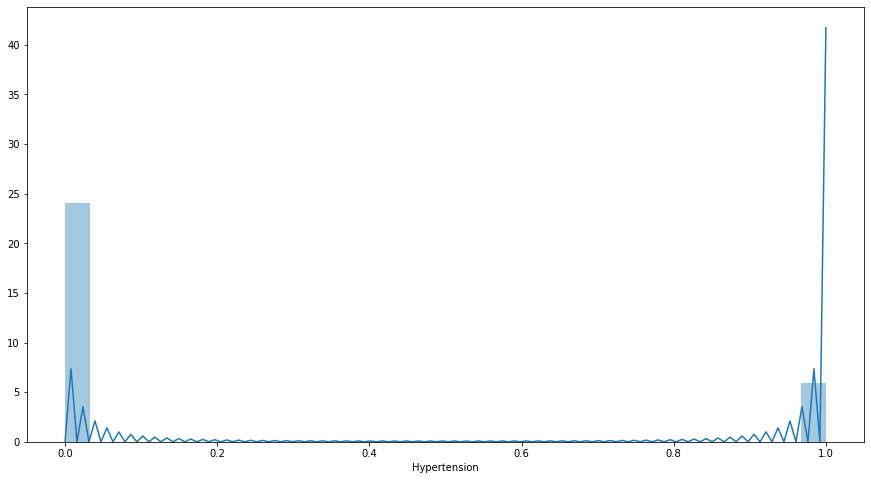

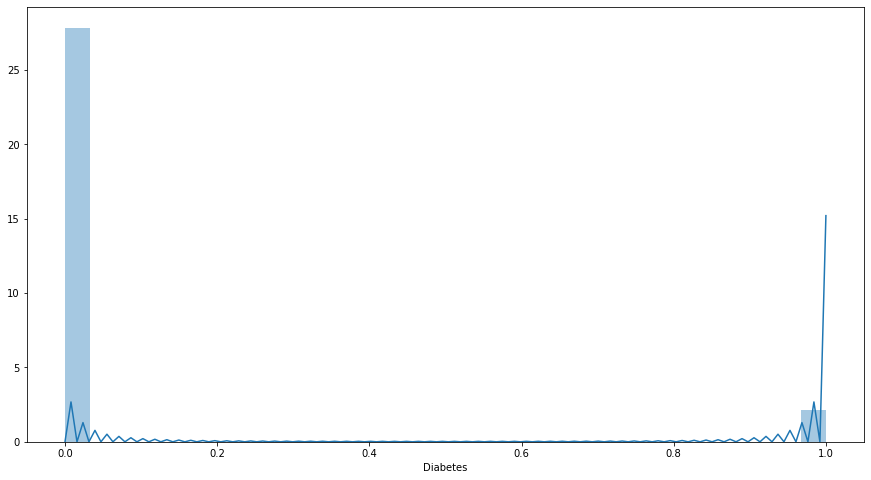

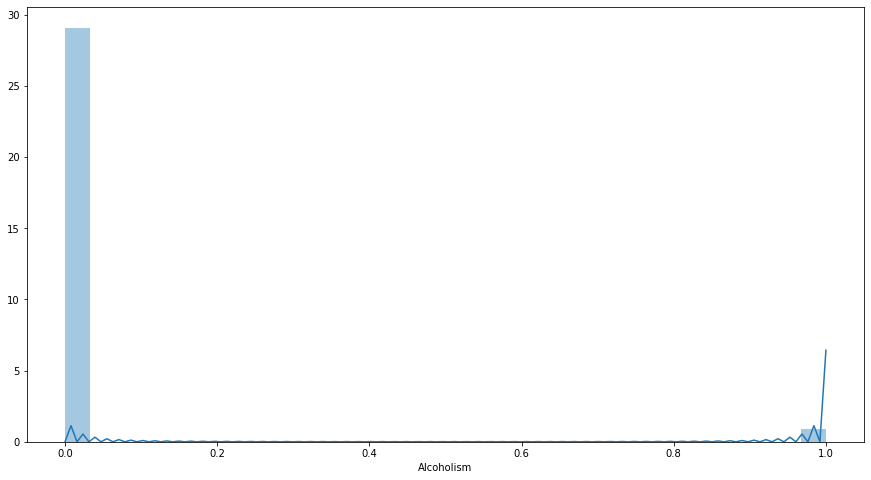

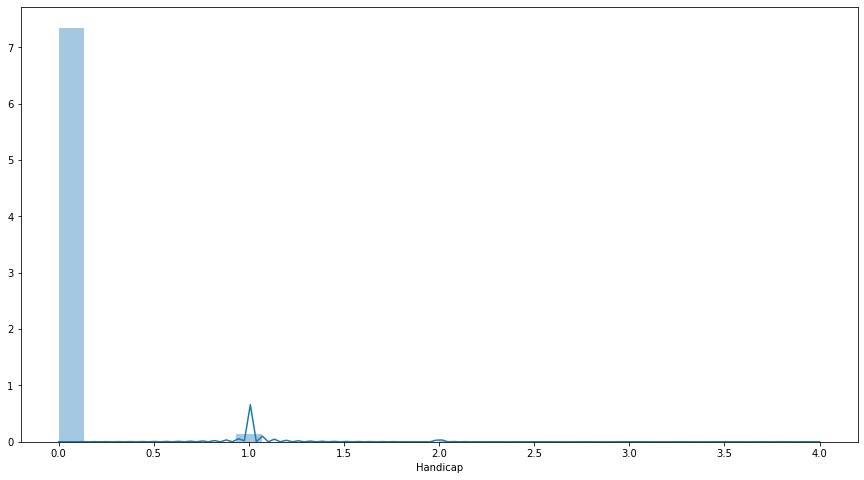

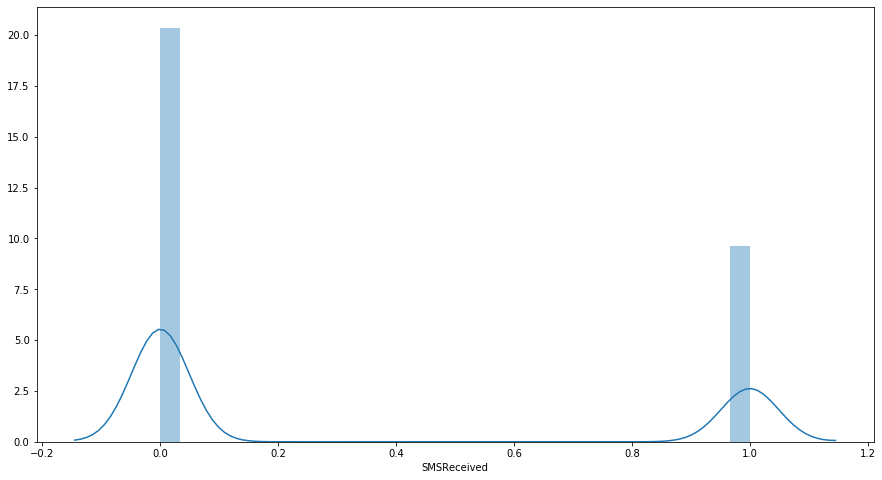

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(15,8))
    sns.distplot(df[col], bins =30)

From the plots and summary statistics, we observe -
Age - Average age of patients is 37 years. The minimum age of -1 is incorrectly  recorded. Also, highest age of 115 is an outlier
The columns - Hypertension, Diabetes amd Alcoholism are binary variables taking 0 and 1 for true and false
Handicap - is also binary 0 and 1. However, there are incorrect vaues like 2, 3 and 4 also recorded in the data
SMSReceived - is also binary 0 and 1.

#### Visualize Distributions
One of the simplest ways we can depict binary distributions is using a pie chart. 

Here we'll look at the distribution of male versus females in the dataset: 

We can use the value_counts function to count the number of each occurence in our column: 

In [17]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

And from the resulting dataframe, we can pull out either the labels or values: 

In [18]:
labels = df.Gender.value_counts().index # create a list of labels for our chart
labels

Index(['F', 'M'], dtype='object')

In [19]:
values = df['Gender'].value_counts().values # count the number of times each gender appears in our dataset
values

array([71840, 38687], dtype=int64)

Now that we have an array of both labels and their associated counts, we can plug this into a matplotlib pie chart: 

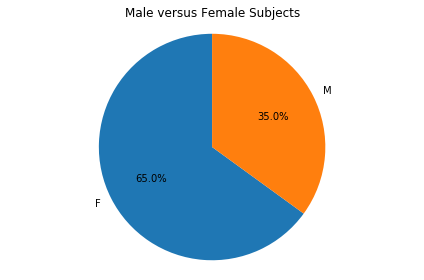

In [20]:
# Create a pie chart
plt.pie(
    values, # plot the value counts
    labels=labels, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%', # label percent
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.title("Male versus Female Subjects")
plt.tight_layout()
plt.show()

We can see above that we have far more females than males in the dataset. This could be due to the fact that more women are caretakers than men, since some of our patients were infants. We would need to check if this is representative of our population. 

#### Plot the distributions for each of our binary variables using the format above

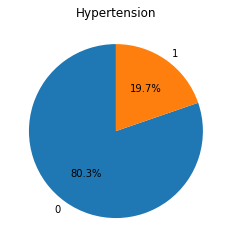

In [21]:
# Create a pie chart for hypertension here
plt.pie(
    df['Hypertension'].value_counts().values, # plot the value counts
    labels= df['Hypertension'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%', # label percent
    )

# View the plot drop above
plt.axis('equal')

plt.title("Hypertension")

plt.show()

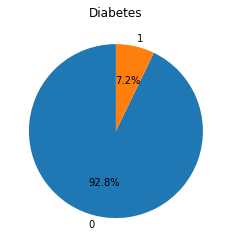

In [22]:
# Create a pie chart for diabetes here
plt.pie(
    df['Diabetes'].value_counts().values, # plot the value counts
    labels= df['Diabetes'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%', # label percent
    )
plt.title("Diabetes")

plt.show()

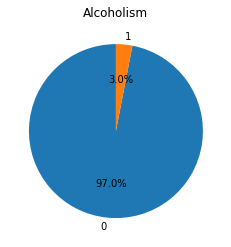

In [23]:
# # Create a pie chart for alcoholism here
plt.pie(
    df['Alcoholism'].value_counts().values,
    labels = df['Alcoholism'].value_counts().index,
    startangle = 90,
    autopct = '%1.1f%%',
        )
plt.title("Alcoholism")
plt.show()

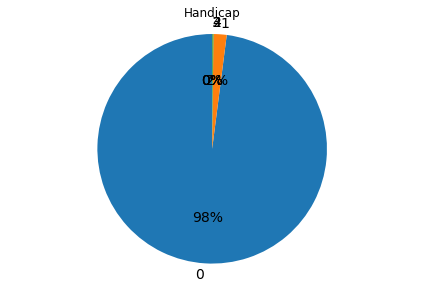

In [48]:
# Create a pie chart for handicap here
plt.pie(
    df['Handicap'].value_counts().values,
    labels = df['Handicap'].value_counts().index,
    startangle = 90,
    textprops={'size':14},
    autopct = '%1.0f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.tight_layout()


plt.title("Handicap")
plt.show()

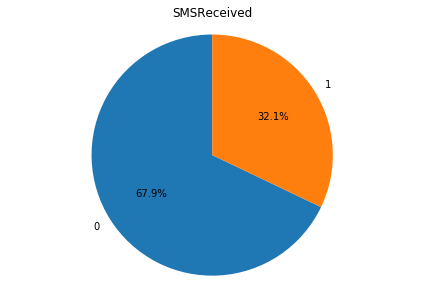

In [26]:
# Create a pie chart for SMSReceived here
plt.pie(
    df['SMSReceived'].value_counts().values,
    labels = df['SMSReceived'].value_counts().index,
    startangle = 90,
    autopct = '%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.tight_layout()

plt.title("SMSReceived")
plt.show()

In [ ]:
We can easily plot all of these in the same visualization by adding the plt.figure() argument: 

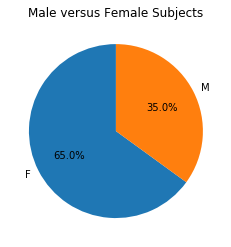

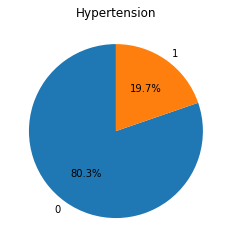

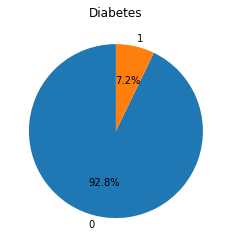

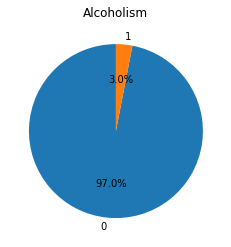

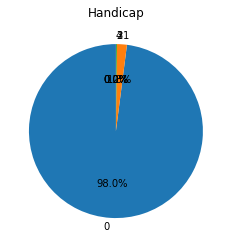

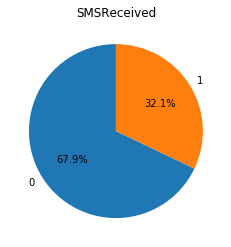

In [50]:
# Create a pie chart
plt.figure(0)
plt.pie(
    values, # plot the value counts
    labels=labels, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%', # label percent
    )
plt.title("Male versus Female Subjects")

plt.figure(1)
plt.pie(
    df['Hypertension'].value_counts().values, # plot the value counts
    labels= df['Hypertension'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%', # label percent
    )
plt.title("Hypertension")

plt.figure(2)
plt.pie(
    df['Diabetes'].value_counts().values, # plot the value counts
    labels= df['Diabetes'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%', # label percent
    )
plt.title("Diabetes")

plt.figure(3)
plt.pie(
    df['Alcoholism'].value_counts().values, # plot the value counts
    labels= df['Alcoholism'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%', # label percent
    )
plt.title("Alcoholism")

plt.figure(4)
plt.pie(
    df['Handicap'].value_counts().values,
    labels = df['Handicap'].value_counts().index,
    startangle = 90,
    autopct = '%1.1f%%',
    )

plt.title("Handicap")

plt.figure(5)
plt.pie(
    df['SMSReceived'].value_counts().values,
    labels = df['SMSReceived'].value_counts().index,
    startangle = 90,
    autopct = '%1.1f%%',
    )

plt.title("SMSReceived")

plt.show()

The [subplot()](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) function is more complicated, but would be a better way to represent this data. Read up on how to use this function for your final project. 

Text(0.5, 1.0, 'SMSReceived')

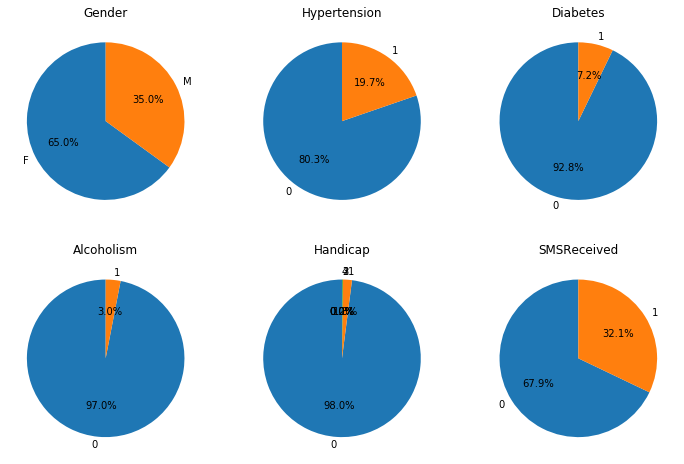

In [59]:
# Pie charts using subplots
fig = plt.figure(figsize=(12,8))
#2 rows 3 cols

#first row, first col
ax1 = plt.subplot2grid((2,3),(0,0))
plt.pie(df['Gender'].value_counts().values, # plot the value counts
    labels= df['Gender'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%',)
plt.title('Gender')

#first row second col
ax1 = plt.subplot2grid((2,3), (0, 1))
plt.pie(df['Hypertension'].value_counts().values, # plot the value counts
    labels= df['Hypertension'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%',)
plt.title('Hypertension')

#first row third col
ax1 = plt.subplot2grid((2,3), (0, 2))
plt.pie(df['Diabetes'].value_counts().values, # plot the value counts
    labels= df['Diabetes'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%',)
plt.title('Diabetes')

#Second row first column
ax1 = plt.subplot2grid((2,3), (1, 0))
plt.pie(df['Alcoholism'].value_counts().values, # plot the value counts
    labels= df['Alcoholism'].value_counts().index, # add the labels
    startangle=90, # make it easier to read by starting at 90degree angle
    autopct='%1.1f%%',)
plt.title('Alcoholism')

#second row second column
ax1 = plt.subplot2grid((2,3), (1, 1))
plt.pie(df['Handicap'].value_counts().values,
    labels = df['Handicap'].value_counts().index,
    startangle = 90,
    autopct = '%1.1f%%',)
plt.title('Handicap')

#second row third column
ax1 = plt.subplot2grid((2,3), (1, 2))
plt.pie(df['SMSReceived'].value_counts().values,
    labels = df['SMSReceived'].value_counts().index,
    startangle = 90,
    autopct = '%1.1f%%',)
plt.title('SMSReceived')

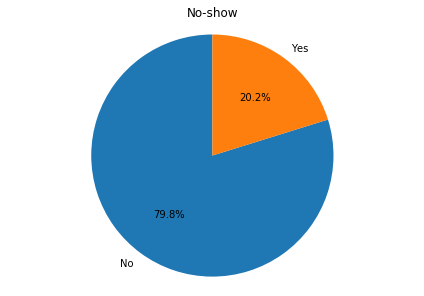

In [77]:
# We can also plot pie chart for No-show to examine proportion of people who miss appointments
plt.pie(
    df['No-show'].value_counts().values,
    labels = df['No-show'].value_counts().index,
    startangle = 90,
    autopct = '%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')
plt.tight_layout()

plt.title("No-show")
plt.show()

#20% of people miss their appointments

For our only non-categorical column, Age, we can use a boxplot to easily visualize the distribution of the column values. A boxplot is essentially a visualization of the describe function. 

The pandas boxplot() function expects an entire dataframe as input, but since we only want to input one column, we can use the [[]] double subset brackets to subset the dataframe and output the results as a dataframe: 

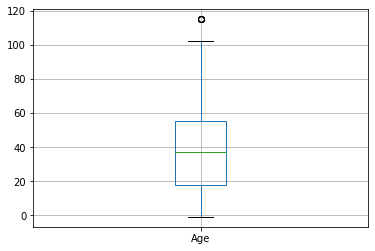

In [60]:
df[["Age"]].boxplot()

We can also just add a column argument: 

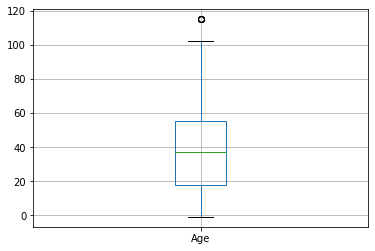

In [61]:
df.boxplot(column="Age")

### Write a paragraph here summarizing what you found in the boxplot

From the Age boxplot, we see that minimum age is incorectly recorded as -1. But there is a good proportion of infant or toddler patient group also. 
25th percentile or first quartile of age is 18 years. Thus 25% of patients are aged <= 18 years. 
Median age is 37 years.
Q3 or 75th percentile is 55 years. Thus 75% of patients are aged 55 years or lower.
Maximum age is 102 years.
IQR = Q3 - Q1. Thus the middle 50% of patients are aged between 18 and 55 years old
There is an outlier age at 115 years.
Age data is positively skewed and hence not symmetric.

Text(0.5, 1.0, 'Age with No-Shows')

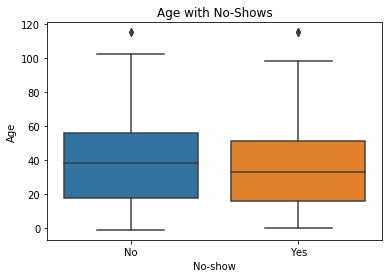

In [90]:
# Boxplot of Age with No-show
ax1 = sns.boxplot(x="No-show", y="Age", data=df)
plt.title('Age with No-Shows')
# Surprisingly older people show up more for appointments than younger people. Median age of show ups is 38 while that of No-show ups is 33 years.

In [89]:
# relationship between gender and no-show
pd.crosstab(df.Gender,df['No-show'], normalize = 'index')
# Not much difference in no-shows due to gender

No-show,No,Yes
Gender,,
F,0.796854,0.203146
M,0.800321,0.199679


In [95]:
# relationship between SMS_received and no-show
pd.crosstab(df['SMSReceived'],df['No-show'], normalize = 'index')
# A higher proportion of people who received SMS reminders (27%) miss their appointments as compared to those who did not (16%).
# SMS may not be useful for reminding people for their upcoming appointments

No-show,No,Yes
SMSReceived,,
0,0.832967,0.167033
1,0.724255,0.275745


### Examine the Correlation Bewteen Variables
Plot the correlation matrix and write a paragraph summarizing your findings. 

In [67]:
df_corr = df.corr()
df_corr

,Age,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
Age,1.000000,0.504586,0.292391,0.095811,0.078033,0.012643
Hypertension,0.504586,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.292391,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.095811,0.087971,0.018474,1.000000,0.004648,-0.026147
Handicap,0.078033,0.080083,0.057530,0.004648,1.000000,-0.024161
SMSReceived,0.012643,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


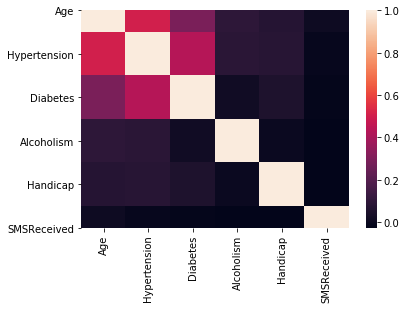

In [76]:
import seaborn as sns
sns.heatmap(df_corr, 
xticklabels=df_corr.columns.values,
yticklabels=df_corr.columns.values)
vmin=-1, # color scale minimum value
vmax=1, # color scale maximum value
center=0, # switch colors at 0 to indicate positive-negative relationships
cmap= sns.diverging_palette(20, 220, n=200), 
square=True 
# axis aspect is set to equal

From the above heatmap, we can see that Hypertension is positively correlated with age. 
As age increases, hypertension also increases. 